In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline

用週來補缺失值的資料

In [ ]:
filename_train = 'df_CLOF_week.csv'
df = pd.read_csv(filename_train, header=0)
print(Counter(df["FLAG"]))
df.head()

Counter({0: 38637, 1: 3585})


,CONS_NO,FLAG,0,1,2,3,4,5,6,7,...,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034
0,0387DD8A07E07FDA6271170F86AD9151,1,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.197036,0.221460,0.222009,0.261526,0.150384,0.240121,0.255214,0.206915,0.251372,0.184962
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.357657,0.586296,0.582377,0.565392,0.594462,0.623532,0.606221,0.530770,0.463811,0.446173
3,B32AC8CC6D5D805AC053557AB05F5343,1,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.268385,0.316782,0.361617,0.312382,0.410434,0.435575,0.376074,0.403520,0.302954,0.245548
4,EDFC78B07BA2908B3395C4EB2304665E,1,0.075339,0.146521,0.181593,0.08625,0.093784,0.138987,0.12288,0.095602,...,0.369161,0.265505,0.220042,0.158731,0.158471,0.174838,0.195362,0.282911,0.256152,0.226536


處理資料不平衡

In [ ]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  # 使用 SMOTE 平衡數據
    ('tomek', TomekLinks()),            # 使用 TomekLinks 清理數據
])

# 在訓練集上應用 pipeline
X_resampled, y_resampled = pipeline.fit_resample(df.iloc[:,2:], df['FLAG'])


In [ ]:
df1 = pd.concat([df.iloc[:,0], y_resampled,X_resampled], axis=1)
print(Counter(df1["FLAG"]))

Counter({0: 38637, 1: 38625})


In [ ]:
df1.head()

,CONS_NO,FLAG,0,1,2,3,4,5,6,7,...,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034
0,0387DD8A07E07FDA6271170F86AD9151,1,-0.027442,-0.027442,-0.027442,-0.027442,-0.027442,-0.027442,-0.027442,-0.027442,...,0.197036,0.221460,0.222009,0.261526,0.150384,0.240121,0.255214,0.206915,0.251372,0.184962
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,-0.032663,-0.032663,-0.032663,-0.032663,-0.032663,-0.032663,-0.032663,-0.032663,...,0.357657,0.586296,0.582377,0.565392,0.594462,0.623532,0.606221,0.530770,0.463811,0.446173
3,B32AC8CC6D5D805AC053557AB05F5343,1,-0.020951,-0.020951,-0.020951,-0.020951,-0.020951,-0.020951,-0.020951,-0.020951,...,0.268385,0.316782,0.361617,0.312382,0.410434,0.435575,0.376074,0.403520,0.302954,0.245548
4,EDFC78B07BA2908B3395C4EB2304665E,1,0.075339,0.146521,0.181593,0.086250,0.093784,0.138987,0.122880,0.095602,...,0.369161,0.265505,0.220042,0.158731,0.158471,0.174838,0.195362,0.282911,0.256152,0.226536


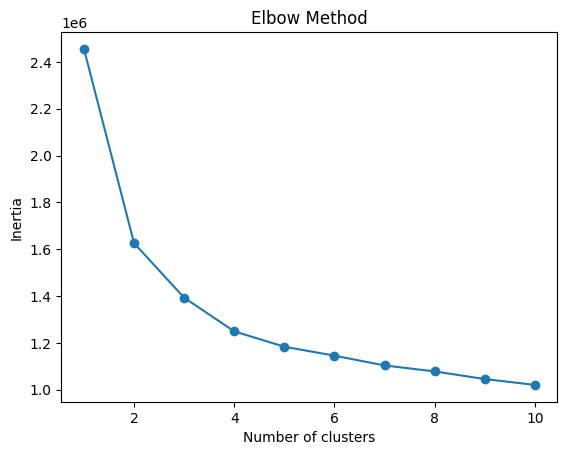

In [ ]:
# 用於保存不同K值下的集群內變異性
inertia = []

# 嘗試不同的聚類數目（K值）
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df.iloc[:,2:])
    inertia.append(kmeans.inertia_)

# 繪製Elbow圖
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4, n_init= 20)  # 假設分為 5 個簇
cluster_labels = kmeans.fit_predict(df.iloc[:,2:])

unique_labels, counts = np.unique(cluster_labels, return_counts=True)

for label, count in zip(unique_labels, counts):
    print(f"簇 {label} 的樣本數量: {count}")

簇 0 的樣本數量: 12678
簇 1 的樣本數量: 9592
簇 2 的樣本數量: 11468
簇 3 的樣本數量: 8484


In [ ]:
dbscan = DBSCAN(eps=8, min_samples=5)
dbscan.fit(df.iloc[:,2:])
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# 打印每个簇的样本数量
for i in range(n_clusters):
    cluster_size = np.sum(labels == i)
    print("Cluster ", i, " contains ", cluster_size, " samples.")

# 如果有噪声点，也可以打印噪声点的数量
if -1 in labels:
    noise_points = np.sum(labels == -1)
    print("Noise points: ", noise_points)

Cluster  0  contains  42144  samples.
Noise points:  78


In [ ]:
for cluster_id in range(kmeans.n_clusters):
    # 提取屬於該簇的樣本
    cluster_samples = df.iloc[:,2:-2][cluster_labels == cluster_id]

    # 使用 LOF 或其他方法進行異常值檢測
    cluster_lof = LocalOutlierFactor(n_neighbors=50)
    cluster_outlier_scores = cluster_lof.fit(cluster_samples)
    lof_scores = cluster_lof.negative_outlier_factor_ #分數越小越異常

    # 識別該簇中的異常值
    Flag_lof = cluster_lof.fit_predict(cluster_samples)
    cluster_outliers = cluster_samples[Flag_lof == -1]

    df.loc[cluster_labels == cluster_id, 'Flag_lof'] = Flag_lof

df['Flag_clof'] = df['Flag_lof'].apply(lambda x: 1 if x == -1 else 0)
# df['Flag_clof'] = np.where(Flag_lof == -1, 1, 0)

In [ ]:
lof_scores = pd.DataFrame(lof_scores, columns=['lof_scores'])
df = pd.concat([df,lof_scores], axis=1)

In [ ]:
def calculate_metrics(actual, predicted):
    TP = 0  # 真正例數
    TN = 0  # 真負例數
    FP = 0  # 假正例數
    FN = 0  # 假負例數

    for i in range(len(actual)):
        if actual[i] == 1 and predicted[i] == 1:
            TP += 1
        elif actual[i] == 0 and predicted[i] == 0:
            TN += 1
        elif actual[i] == 0 and predicted[i] == 1:
            FP += 1
        elif actual[i] == 1 and predicted[i] == 0:
            FN += 1

    accuracy = (TP + TN) / (TP + TN + FP + FN)

    if TP + FP == 0:
        precision = 0
    else:
        precision = TP / (TP + FP)

    if TP + FN == 0:
        recall = 0
    else:
        recall = TP / (TP + FN)

    if precision + recall == 0:
        f1_score = 0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)

    return accuracy, precision, recall, f1_score

accuracy, precision, recall, f1_score = calculate_metrics(df['FLAG'], df['Flag_clof'])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Accuracy: 0.8131069110890057
Precision: 0.11066907775768535
Recall: 0.1707112970711297
F1 Score: 0.13428414701042238
